# AGN Catalog Toolbox (ACT) Encapsulated Testing

This is an example notebook showing the AGN Catalog Toolbox Testing code (written by Chris) in action.

In [1]:
from AGNCatalogToolbox import TestingFramework
from AGNCatalogToolbox import Literature

import numpy as np
from matplotlib import pyplot as plt

# Set the redshift of interest here.
redshift = 0

The variables we wish to test are listed in arrays for easy repeated access - in this case we test the parameters for the eddington ratio distribution.

In [2]:
# Variations
variations = [0.2, 0, -0.2]
variable_name = r"$\lambda$"
iterations = len(variations)

Next we create the class, and we call the approprate member functions to read in the data, assign the variables we want and then return the plotting data. Much of the best behaviour is encapsulated by the default arguments, so some parameters do not need to be called. Running this section can take some time.

Note that calling the member function to load in the multidark data expects a file in a subfolder '/BigData/' that is named 'MD_<redshift>.npy, in with the columns x, y, z, scale at accretion, mass at accretion, and mvir. You can override this.

In [3]:
# Create the master class.
obj = TestingFramework.AGNCatalog()
obj.set_z(redshift)

# Load in the MultiDark Haloes.
obj.generate_semi_analytic_halos()
#obj.load_dm_catalog(path_big_data="./BigData/")
obj.assign_stellar_mass()
obj.assign_black_hole_mass()

Generating Semi-Analytic halos
Assigning Stellar Mass
Scatter is a thing, valued at 0.001
Assigning Black Hole Mass


### Example of catalog cut - reduce volume

In [4]:

limit = 750 # Mpc/h
flag = (obj.main_catalog['x'] < limit) * (obj.main_catalog['y'] < limit) * (obj.main_catalog['z'] < limit)

obj.main_catalog = obj.main_catalog[flag]
obj.volume = (limit/obj.h)**3


In [5]:
# Loop to support variations in parameters
for i in range(iterations):
    obj.assign_duty_cycle("Schulze")
    
    obj.assign_luminosity(parameter1 = variations[i], parameter2 = -0.25)
    obj.assign_obscuration()
    
    #obj.get_wp()
    # We then compute the bias
    #obj.get_bias()
    #obj.get_hod()

Assigning Duty Cycle, using Schulze's method
GetCorrectFile: Schulze_0.1.csv
Found Schulze file: ./Data/DutyCycles/Schulze_0.1.csv
[5.92432509e-05 8.84824416e-05 1.00979266e-04 ... 2.33234685e-01
 1.43734164e-01 2.33234685e-01]
Assigning Luminosity
Assigning Nh
Assigning AGN type
Assigning Duty Cycle, using Schulze's method
GetCorrectFile: Schulze_0.1.csv
Found Schulze file: ./Data/DutyCycles/Schulze_0.1.csv
[5.92432509e-05 8.84824416e-05 1.00979266e-04 ... 2.33234685e-01
 1.43734164e-01 2.33234685e-01]
Assigning Luminosity
Assigning Nh
Assigning AGN type
Assigning Duty Cycle, using Schulze's method
GetCorrectFile: Schulze_0.1.csv
Found Schulze file: ./Data/DutyCycles/Schulze_0.1.csv
[5.92432509e-05 8.84824416e-05 1.00979266e-04 ... 2.33234685e-01
 1.43734164e-01 2.33234685e-01]
Assigning Luminosity
Assigning Nh
Assigning AGN type


### XLF

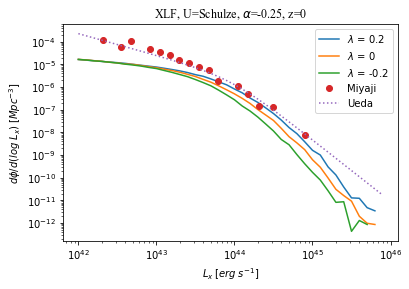

In [6]:
# Plot of the XLF 

plt.figure()

for i in range(iterations):
    try:
        plt.plot(10**obj.XLF_plottingData[i].x, 10**obj.XLF_plottingData[i].y, label = r"{} = {}".format(variable_name, variations[i]))
    except:
        pass
    
    
# XLF Data

XLF = Literature.XLFData(redshift)

mXLF_data = XLF.get_miyaji2015()
plt.plot(mXLF_data.x, mXLF_data.y, 'o', label = "Miyaji")

uXLF_data = XLF.get_ueda14(np.arange(42, 46, 0.1))
plt.plot(uXLF_data.x, uXLF_data.y, ':', label = "Ueda")



# Plotting
plt.xlabel(r'$L_x\;[erg\;s^{-1}]$')
plt.ylabel(r'$d\phi /d(log\;L_x)\;[Mpc^{-3}]$')
plt.title(r'XLF, U=Schulze, $\alpha$=-0.25, z=0', fontname = 'Times New Roman')
plt.loglog()
plt.legend()
plt.savefig("./Plots/XLF_Ucomparison_z0.png", dpi=400)
plt.show()

### Eddington Ratio Distribution

Warning - we have requested redshift 0 - Selecting file Geo17z0.25.csv as it is closest
Warning - we have requested redshift 0 - Selecting file Bon16z0.25.csv as it is closest
Warning - we have requested redshift 0 - Selecting file Bon12z0.25.csv as it is closest
Warning - we have requested redshift 0 - Selecting file Aird12z0.25.csv as it is closest


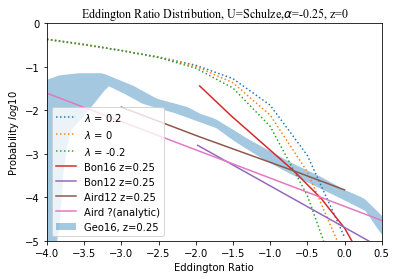

In [7]:
# Plot the Eddington ratio distribution

plt.figure()

for i in range(iterations):
    try:
        plt.plot(obj.Edd_plottingData[i].x, obj.Edd_plottingData[i].y, ':', label = r"{} = {}".format(variable_name, variations[i]))
    except:
        pass

EddData = Literature.EddingtonDistributionData(redshift)
#plt.plot(EddData.Geo.x, EddData.Geo.y, label = "Geo")

plt.fill_between(EddData.Geo.x, EddData.Geo.yu, EddData.Geo.yd, alpha=0.4, label = "Geo16, z={}".format(EddData.Geo.z) )

plt.plot(EddData.Bon16.x, EddData.Bon16.y, label = "Bon16 z={}".format(EddData.Bon16.z)) 
plt.plot(EddData.Bon12.x, EddData.Bon12.y, label = "Bon12 z={}".format(EddData.Bon12.z))
plt.plot(EddData.Aird12.x, EddData.Aird12.y, label = "Aird12 z={}".format(EddData.Aird12.z) )

eddbin = np.arange(-4, 1., 0.5)
probSche = EddData.AirdDist(eddbin)
plt.plot(eddbin, probSche, label = "Aird ?(analytic)")
plt.title(r'Eddington Ratio Distribution, U=Schulze,$\alpha$=-0.25, z=0', fontname = 'Times New Roman')
plt.xlabel("Eddington Ratio")
plt.ylabel("Probability $log10$")
plt.xlim((-4, 0.5))
plt.ylim((-5, 0))

plt.legend()

plt.savefig("./Plots/ERD_Ucomparison_z0.png", dpi=400)

plt.show()


### WP

In [8]:
plt.figure()

wp_data = Literature.WPData(redshift)

for i in range(iterations):
    try:
        plt.plot(obj.WP_plottingData[i].x, obj.WP_plottingData[i].y, ':', label = r"{} = {}".format(variable_name, variations[i]))
        if i == 4:
            break
    except:
        pass
    
plt.errorbar(wp_data.r_Koutoulidis, wp_data.wp_Koutoulidis,\
                yerr = wp_data.wp_Koutoulidis_e, fmt='o', label = "Koutoulidis Data, z~1")

plt.plot(obj.wpbins, wp_data.k_power_law(obj.wpbins), label = "Koutoulidis Fit, z~1")
plt.title(r'wp (obscured), z=1, $\alpha$=-0.4', fontname = 'Times New Roman')    
plt.xlabel(r'$r_p$ $Mpc/h$')
plt.ylabel(r'$w(r_p)$')    

plt.legend()
plt.loglog()
plt.savefig("./Plots/clustering_varyingk_z1.png", dpi=400)

plt.show()



NameError: name 'actl' is not defined

### Bias

In [ ]:
plt.figure()

for i in range(iterations):
    plt.plot(obj.bias_plottingData[i].x, obj.bias_plottingData[i].y, ':', label = r"{} = {}".format(variable_name, variations[i]))
    
plt.xlabel("Stellar Mass")
plt.ylabel("Bias")
plt.legend()
plt.show()

### HOD

In [ ]:




plt.figure()

for i in range(iterations):
    plt.plot(10**obj.HOD_plottingData[i].x, obj.HOD_plottingData[i].y, ':', label = r"{} = {}".format(variable_name, variations[i]))
    
plt.xlabel("Halo Mass")
plt.ylabel("HOD")
plt.loglog()
plt.legend()
plt.show()